In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from class_features import Features
from class_models import Linear, GLM
import scipy.stats as scs

In [3]:
metadata = pd.read_excel('data/Data Dictionary.xlsx')
Train = pd.read_csv('data/Train.csv',low_memory=False)
Test = pd.read_csv('data/Test.csv')

Text(0.5, 1.0, 'Log of Sale Price')

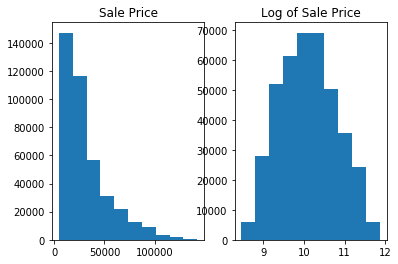

In [4]:
#Target variable histograms
fig, axs=plt.subplots(1,2)
axs[0].hist(Train['SalePrice'])
axs[0].set_title('Sale Price')
axs[1].hist(np.log(Train['SalePrice']))
axs[1].set_title('Log of Sale Price')

We noticed by graphing the Sale Price, that this is a skewed distribution, so by taking the log of the sale price, we can see it makes our distribution normal, more on this after the next graph

In [5]:
#Features
X=Features().features_clean(Train)
y = Train['SalePrice']

In [6]:
#Linear model with log transformed target variable
linear = Linear(X,np.log(y))

In [7]:
linear.cv_mse(5)

0.17123040418401134

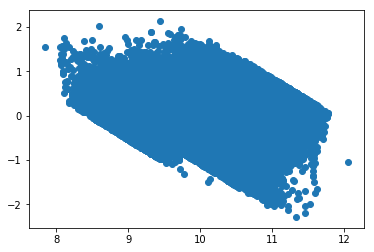

In [8]:
linear.resid_scatter(X,np.log(y))

We can see the spread of the residuals changes with the values of the
dependent variable (heteroscedasticity).  We are taking the log of the 
target variable to remove the change in spread.

We see our linear model summary below, the R-Squared is .689, not bad for fitting our first model

In [9]:
linear.model_summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                 1.739e+04
Date:                Mon, 04 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:27:44   Log-Likelihood:            -1.8843e+05
No. Observations:              401125   AIC:                         3.770e+05
Df Residuals:                  401073   BIC:                         3.775e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           10.5743      0.021    498.357      0.000      10.533      10.616
Conventional                    -0.0727      0.004    -16.542      0.000      -0.081      -0.064
PAT                             -0.2235      0.004    -54.073      0.000      -0.232      -0.215
None or Unspecified             -0.2061      0.005    -43.019      0.000      -0.215      -0.197
Straight                        -0.1179      0.004    -26.441      0.000      -0.127      -0.109
Rubber                           0.8237      0.010     80.445      0.000       0.804       0.844
Steel                            0.9547      0.009    101.197      0.000       0.936       0.973
20.5                            -0.0295      0.004     -8.113      0.000      -0.037      -0.022
Standard                         0.1119      0.003     36.268      0.000       0.106       0.118
Extended                        -0.5457      0.387     -1.410      0.159      -1.304       0.213
Standard                        -0.6106      0.387     -1.577      0.115      -1.369       0.148
All Wheel Drive                  1.0899      0.021     52.948      0.000       1.050       1.130
Four Wheel Drive                 0.4551      0.387      1.175      0.240      -0.304       1.214
No                               1.1295      0.016     69.641      0.000       1.098       1.161
Two Wheel Drive                  0.2854      0.387      0.737      0.461      -0.474       1.044
product_class_Backhoe_Loader     0.0943      0.003     31.208      0.000       0.088       0.100
Compact                         -0.4870      0.006    -87.908      0.000      -0.498      -0.476
Large                            0.5957      0.004    156.719      0.000       0.588       0.603
Large / Medium                   0.3196      0.009     34.378      0.000       0.301       0.338
Medium                           0.4399      0.002    176.663      0.000       0.435       0.445
Mini                            -0.6867      0.010    -71.223      0.000      -0.706      -0.668
Small                           -0.0154      0.009     -1.637      0.102      -0.034       0.003
Tennessee                        0.0077      0.004      1.913      0.056      -0.000       0.016
Pennsylvania                    -0.0534      0.004    -13.087      0.000      -0.061      -0.045
South Carolina                  -0.0089      0.004     -2.174      0.030      -0.017      -0.001
Illinois                         0.0345      0.004      8.974      0.000       0.027       0.042
New Jersey                       0.0514      0.004     13.158      0.000       0.044       0.059
North Carolina                  -0.0164      0.004     -4.133      0.000      -0.024      -0.009
Mississippi                      0.0159      0.004      4.400      0.000    

In [10]:
#GLM Gamma family with log-link
glm = GLM(X,y)

In [11]:
glm.cv_mse(5)

0.1383240647402594

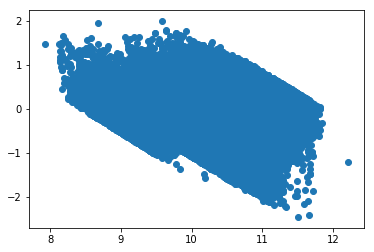

In [12]:
glm.resid_scatter(X,y)

In [13]:
glm.model_summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              SalePrice   No. Observations:               401125
Model:                            GLM   Df Residuals:                   401073
Model Family:                   Gamma   Df Model:                           51
Link Function:                    log   Scale:                         0.14448
Method:                          IRLS   Log-Likelihood:            -4.2367e+06
Date:                Mon, 04 Mar 2019   Deviance:                       57418.
Time:                        16:30:31   Pearson chi2:                 5.79e+04
No. Iterations:                    24   Covariance Type:             nonrobust
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           10.6129      0.021    509.352      0.000      10.572      10.654
Conventional                    -0.0590      0.004    -13.676      0.000      -0.067      -0.051
PAT                             -0.2128      0.004    -52.442      0.000      -0.221      -0.205
None or Unspecified             -0.1772      0.005    -37.670      0.000      -0.186      -0.168
Straight                        -0.1150      0.004    -26.255      0.000      -0.124      -0.106
Rubber                           0.7596      0.010     75.546      0.000       0.740       0.779
Steel                            0.8948      0.009     96.587      0.000       0.877       0.913
20.5                            -0.0420      0.004    -11.778      0.000      -0.049      -0.035
Standard                         0.1071      0.003     35.353      0.000       0.101       0.113
Extended                        -0.5068      0.380     -1.333      0.182      -1.252       0.238
Standard                        -0.5633      0.380     -1.482      0.138      -1.308       0.182
All Wheel Drive                  1.0874      0.020     53.796      0.000       1.048       1.127
Four Wheel Drive                 0.4018      0.380      1.057      0.291      -0.344       1.147
No                               1.1458      0.016     71.937      0.000       1.115       1.177
Two Wheel Drive                  0.2396      0.380      0.630      0.529      -0.506       0.985
product_class_Backhoe_Loader     0.0817      0.003     27.519      0.000       0.076       0.088
Compact                         -0.4883      0.005    -89.768      0.000      -0.499      -0.478
Large                            0.6791      0.004    181.946      0.000       0.672       0.686
Large / Medium                   0.4007      0.009     43.893      0.000       0.383       0.419
Medium                           0.4631      0.002    189.391      0.000       0.458       0.468
Mini                            -0.6321      0.009    -66.760      0.000      -0.651      -0.614
Small                            0.0344      0.009      3.725      0.000       0.016       0.053
Tennessee                        0.0008      0.004      0.203      0.839      -0.007       0.009
Pennsylvania                    -0.0548      0.004    -13.680      0.000      -0.063      -0.047
South Carolina                  -0.0096      0.004     -2.403      0.016      -0.018      -0.002
Illinois                         0.0260      0.004      6.888      0.000       0.019       0.033
New Jersey                       0.0505      0.004     13.162      0.000       0.043       0.058
North Carolina                  -0.0240      0.004     -6.134      0.000      -0.032      -0.016
Mississippi                      0.0117      0.004      3.312      0.001       0.005       0.019
Ohio                             0.0116      0.004      3.

In [14]:
# Predictions Test data
X_test=Features().features_clean(Test)

Test['SalePrice_glm'] = glm.predict_y(X_test)
Test['SalePrice_linear'] = np.exp(linear.predict_y(X_test))

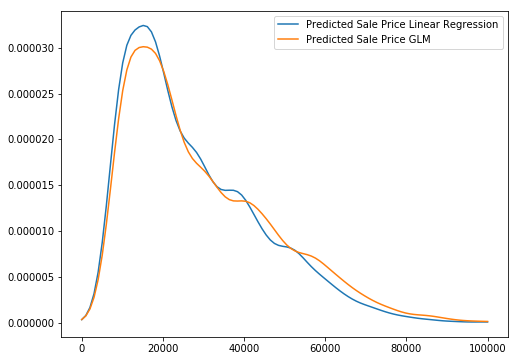

In [18]:
#Kernel density estimation
kde_linear = scs.gaussian_kde(Test['SalePrice_linear'])
kde_glm = scs.gaussian_kde(Test['SalePrice_glm'])

xx = np.linspace(0, 100000, 100)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(xx, kde_linear(xx), label = 'Predicted Sale Price Linear Regression')
ax.plot(xx, kde_glm(xx), label = 'Predicted Sale Price GLM')
ax.legend()